In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

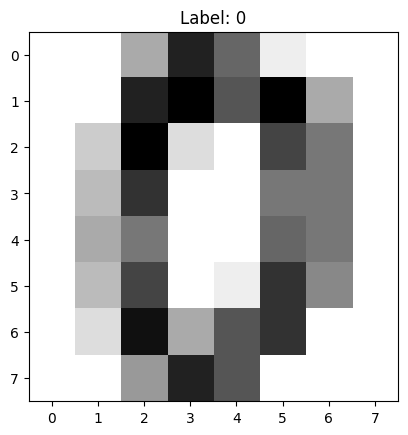

In [ ]:
# 데이터 불러오기
digits = datasets.load_digits()

# 이미지 시각화 (옵션)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Label: {digits.target[0]}")
plt.show()

In [ ]:
# 데이터 전처리
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))  # 8x8 이미지를 64차원 벡터로 변환
y = digits.target

# 표준화 (성능 향상 가능)
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

# 학습용/테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [13]:
# 학습용/테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DNN 모델 구축
model = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # 0~9 숫자 분류
])

# 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 학습
model_history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2559 - loss: 2.1380 - val_accuracy: 0.6944 - val_loss: 1.4502
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7679 - loss: 1.2140 - val_accuracy: 0.9028 - val_loss: 0.7426
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8721 - loss: 0.6305 - val_accuracy: 0.9028 - val_loss: 0.4303
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9309 - loss: 0.3353 - val_accuracy: 0.9236 - val_loss: 0.3057
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9471 - loss: 0.2415 - val_accuracy: 0.9375 - val_loss: 0.2424
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9756 - loss: 0.1592 - val_accuracy: 0.9444 - val_loss: 0.1982
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9753 - loss: 0.1307 - val_accuracy: 0.9583 - val_loss: 0.1777
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9813 - loss: 0.0984 - val_accuracy: 0.9583 - val_loss

In [14]:
# 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# 예측 및 리포트
y_pred = model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9667
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.96      0.93      0.95        28
           2       0.97      1.00      0.99        33
           3       1.00      0.94      0.97        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.96      0.90      0.93        30
           9       0.89      0.97      0.93        40

    accuracy                           0.97       360
   macro avg       0.97      0.96      0.97       360
weighted avg       0.97      0.97      0.97       360



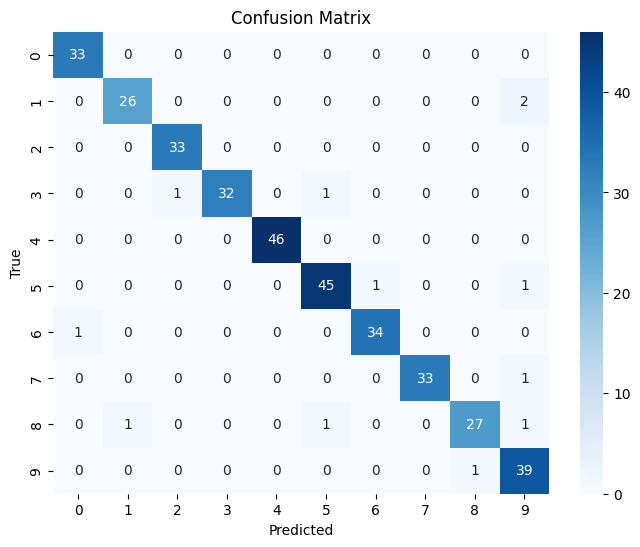

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

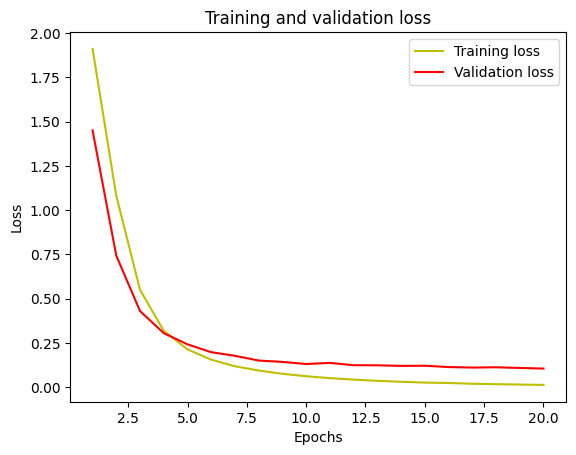

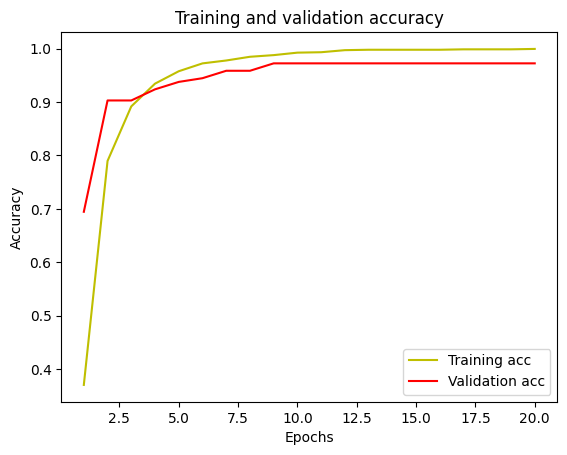

In [16]:
# 6. Training and validation Loss/ Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# 새로운 입력 데이터로 숫자 0 구분해보기
from PIL import Image
import numpy as np

In [20]:
def preprocess_custom_image(image_path):
    # 이미지 불러오기 (흑백)
    img = Image.open(image_path).convert('L')  # L: grayscale

    # 8x8로 리사이즈 (digits 데이터셋 크기와 맞춤)
    img = img.resize((8, 8), Image.Resampling.LANCZOS)

    # NumPy 배열로 변환 및 정규화
    img_array = np.array(img)

    # digits 데이터는 밝기가 0~16 범위 → 맞춰줌
    img_array = 16 - (img_array / 255.0 * 16)  # 흰 배경에 검은 숫자 기준
    img_array = img_array.clip(0, 16)

    # 1D 벡터로 변환
    img_vector = img_array.reshape(1, -1)

    return img_vector

In [21]:
custom_image = preprocess_custom_image('/content/sample_data/image_zero.png')  # 이미지 경로 지정
prediction = model.predict(custom_image)
predicted_label = prediction.argmax()
print(f"예측 결과: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
예측 결과: 0
